Importing all the libraries

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import warnings
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Listing all files in current directory

In [2]:
print(os.listdir())

['.config', 'sample_data']


To ignore the any warnings

In [3]:
warnings.filterwarnings('ignore')

Uploading a good dataset i.e., Heart Dataset csv file

In [4]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


Listing all the files in current directory once again

In [5]:
print(os.listdir())

['.config', 'heart.csv', 'sample_data']


Assigning variable data to refer to csv file

In [6]:
data = pd.read_csv("heart.csv")

Print Shape of data(rows,cols), Type(datatype) and first 5 rows of dataset

In [7]:
print("Shape of data is :", data.shape)
print("Type of data is :", type(data))
print("First 5 rows of data is :\n", data.head())

Shape of data is : (303, 14)
Type of data is : <class 'pandas.core.frame.DataFrame'>
First 5 rows of data is :
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


Providing statistical calculations of data

In [8]:
print(data.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

Checking for missing values

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Thus, there are no missing values(all are non-null).

Show the correlation between the columns & sort them in descending order

In [10]:
print(data.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


Thus, mostly of all columns are moderately correlated but fbs is weakly correlated.

________________________________________________________________________________

**Exploratory Data Analysis**

Calculating frequency of heart disease cases

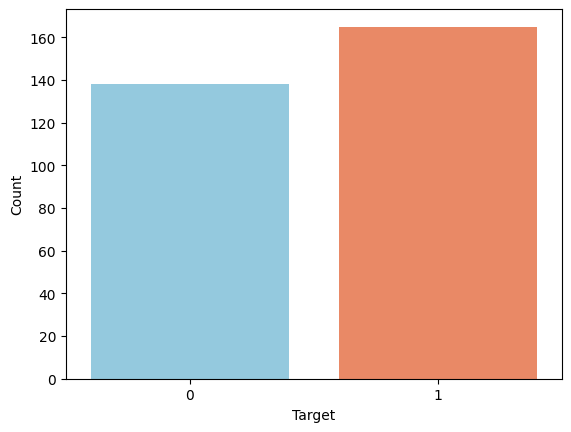

target
1    165
0    138
Name: count, dtype: int64


In [11]:
target_counts = data['target'].value_counts()

sns.barplot(x=target_counts.index, y=target_counts.values, palette=['skyblue', 'coral'])

plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

print(target_counts)

Calculating how many pateints can have heart disease

target
1    165
0    138
Name: count, dtype: int64


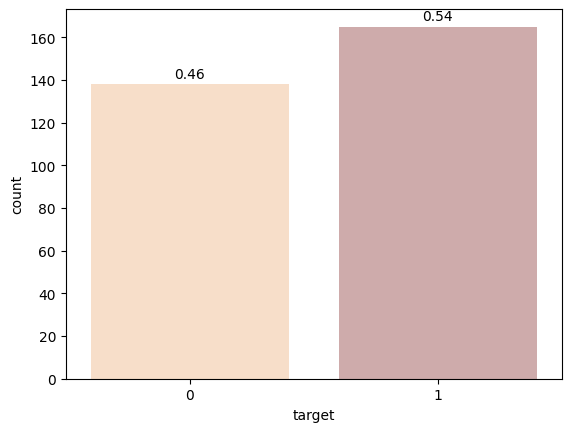

In [12]:
total = len(data)

palette = ["#FFB6C1", "#FFD700"]

ax = sns.countplot(x = data["target"], palette = ['#FFDDC1', '#D4A5A5'])
target_temp = data.target.value_counts()
print(target_temp)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")

Comparing the likelihood of heart disease in male & female. Here 0 is female & 1 is male.

<Axes: xlabel='sex', ylabel='target'>

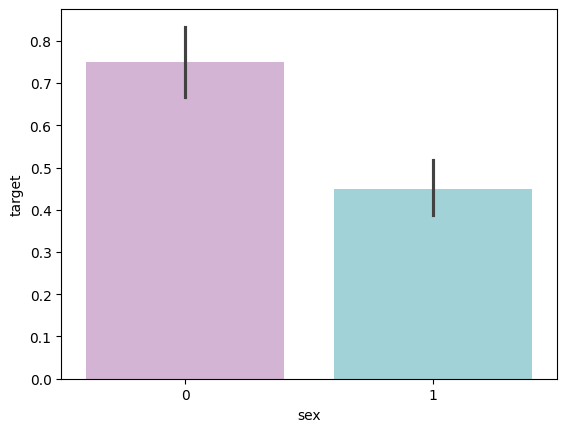

In [13]:
sns.barplot(x=data["sex"], y=data['target'], palette=['#D9AFD9', '#97D9E1'])

In [14]:
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])
print("Female Patients % :{:.2f}%".format((countFemale)/(len(data.sex))*100))
print("Male Patients % :{:.2f}%".format((countMale)/(len(data.sex))*100))

Female Patients % :31.68%
Male Patients % :68.32%


Density plot and bar plot for age

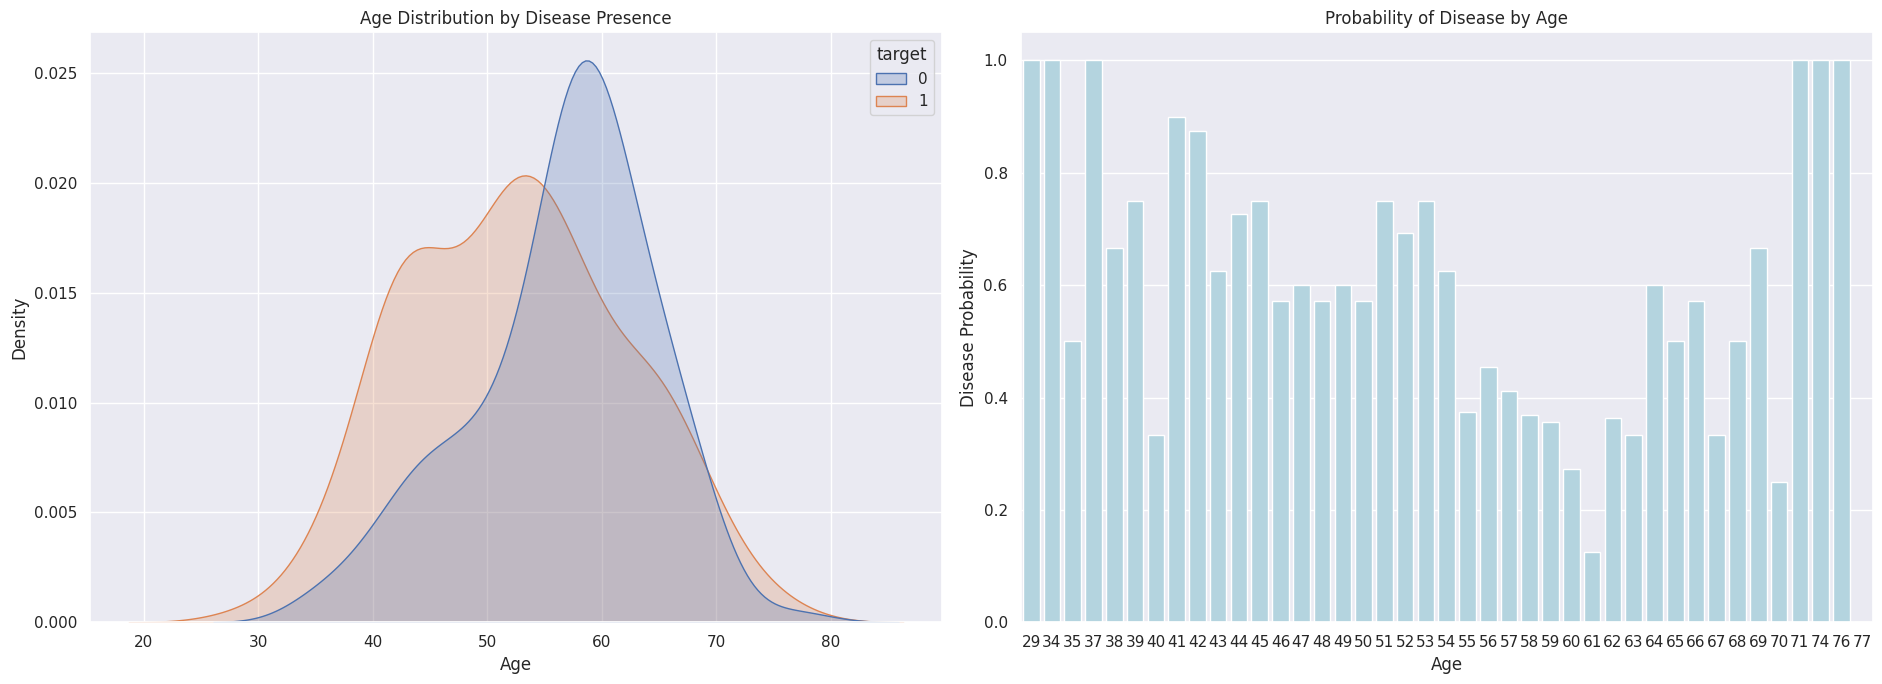

In [77]:
def plotAge():
    fig, axes = plt.subplots(1, 2, figsize=(19, 7))

    # Density plot
    sns.kdeplot(data=data, x="age", hue="target", shade=True, ax=axes[0])
    axes[0].set_title("Age Distribution by Disease Presence")
    axes[0].set_xlabel("Age")
    axes[0].set_ylabel("Density")

    # Bar plot
    avg = data.groupby("age", as_index=False)["target"].mean()
    sns.barplot(x="age", y="target", data=avg, ax=axes[1], color="lightblue")
    axes[1].set_title("Probability of Disease by Age")
    axes[1].set_xlabel("Age")
    axes[1].set_ylabel("Disease Probability")

    plt.tight_layout()
    plt.show()

plotAge()

Barplot representation of heart disease acc to different categories

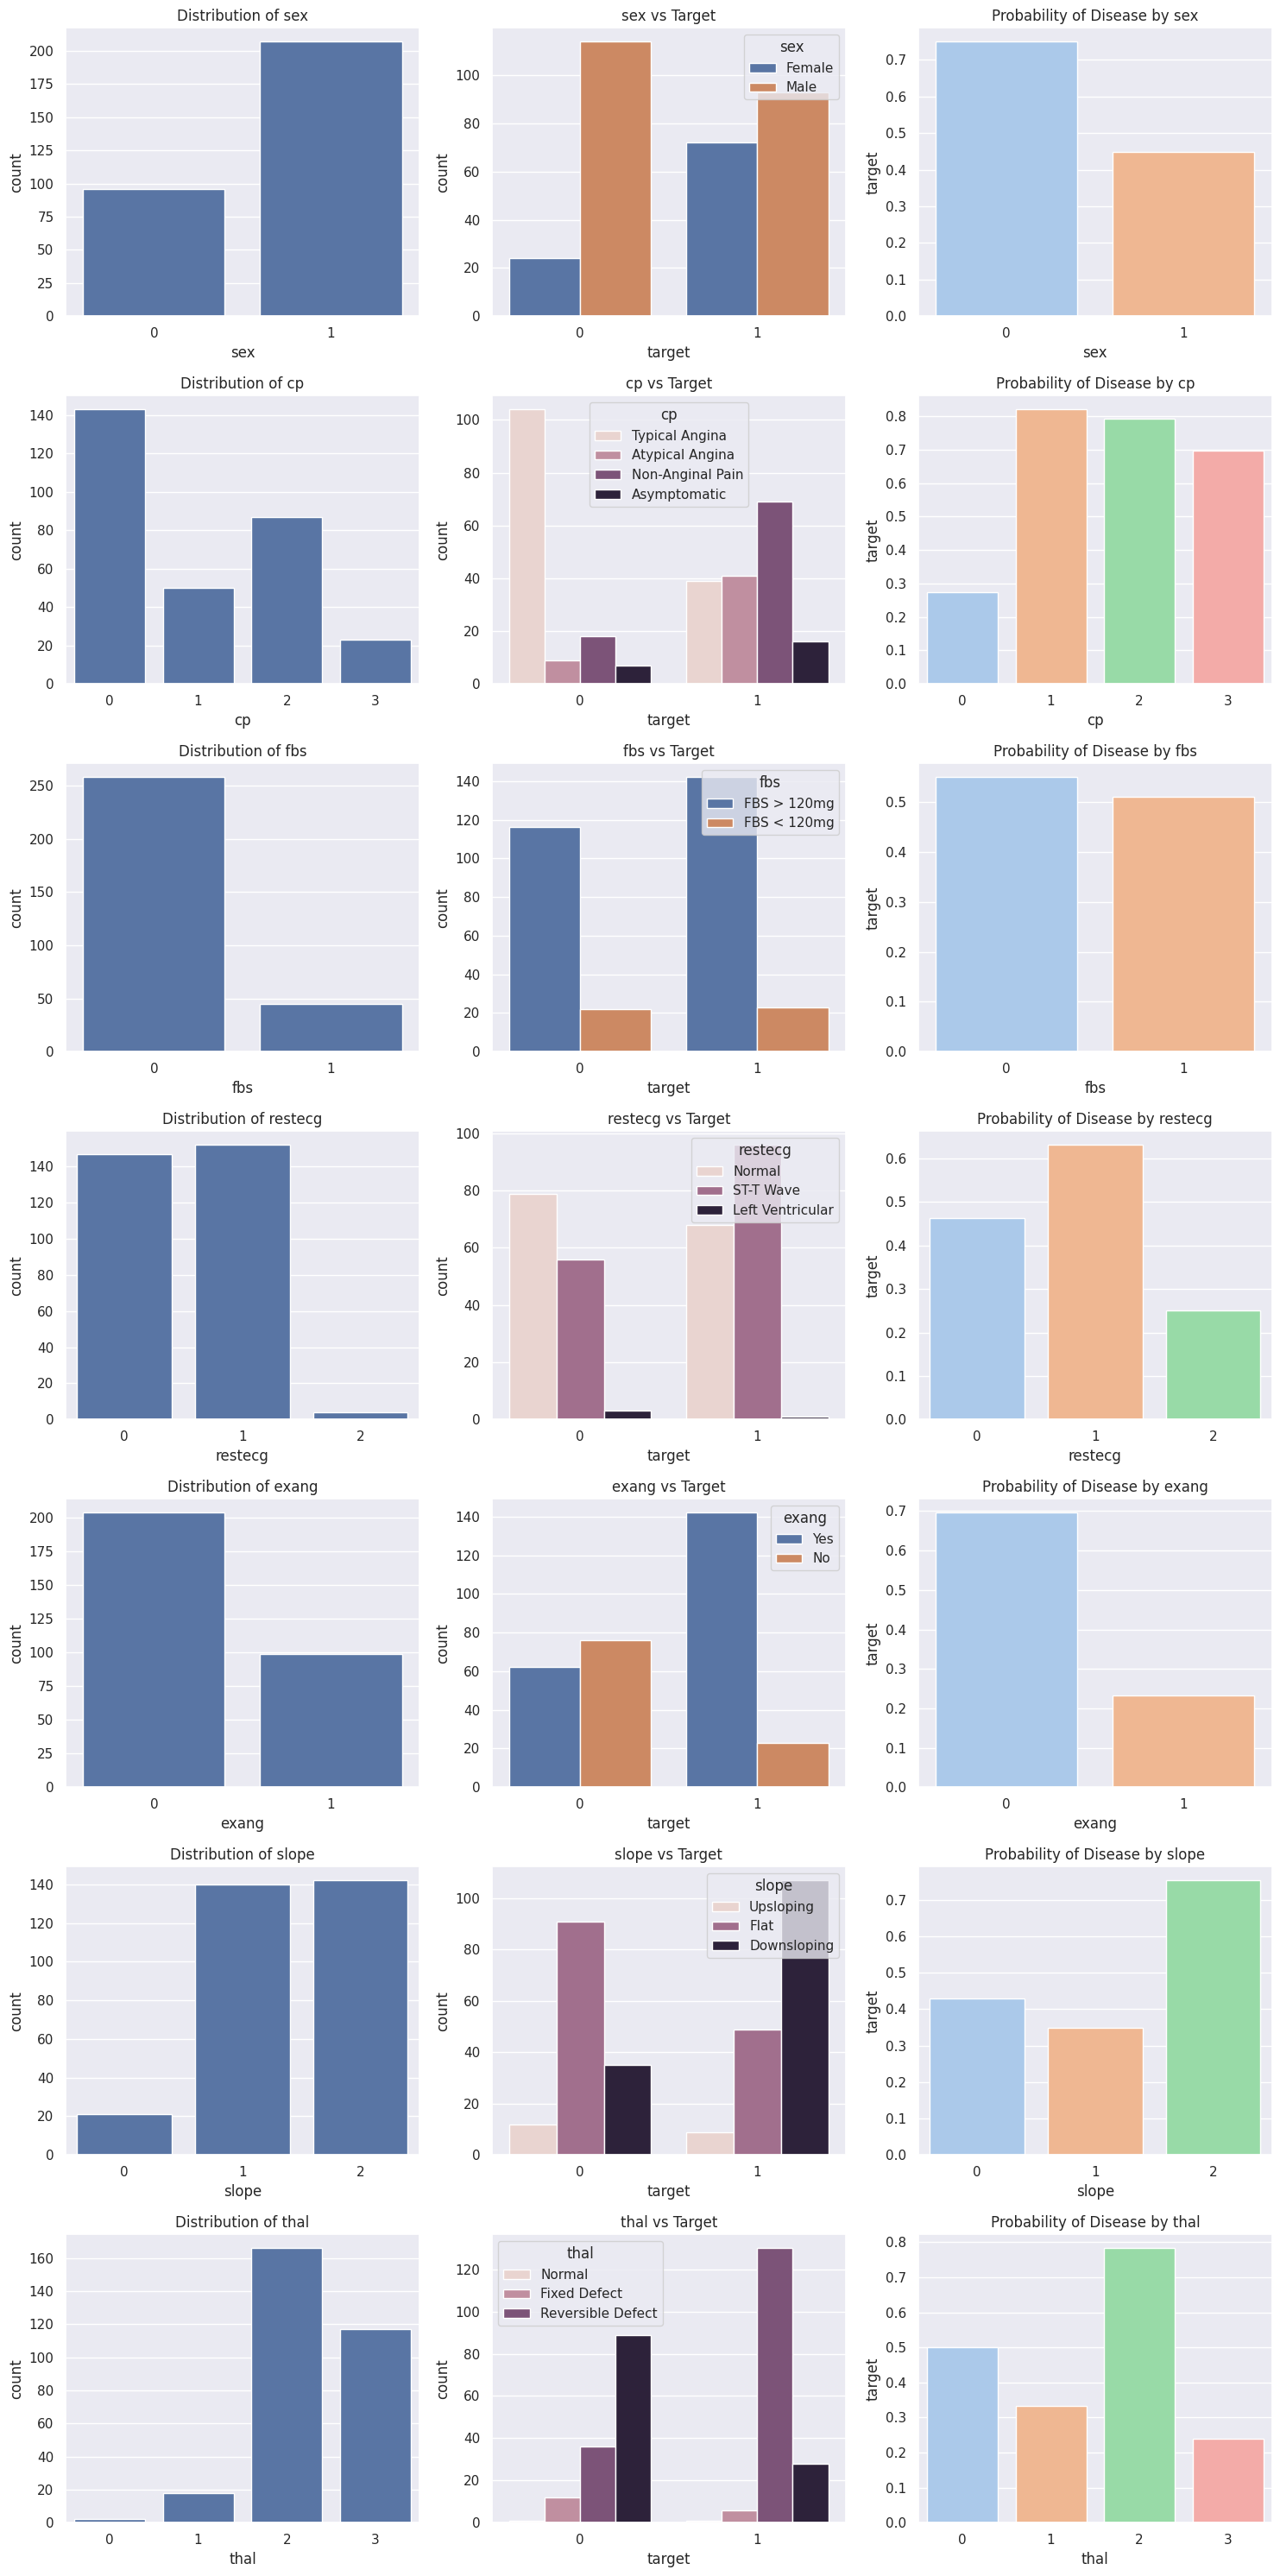

In [78]:
categorical = {
    'sex': ['Female', 'Male'],
    'cp': ['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'],
    'fbs': ['FBS > 120mg', 'FBS < 120mg'],
    'restecg': ['Normal', 'ST-T Wave', 'Left Ventricular'],
    'exang': ['Yes', 'No'],
    'slope': ['Upsloping', 'Flat', 'Downsloping'],
    'thal': ['Normal', 'Fixed Defect', 'Reversible Defect']
}

def plot_categorical():
    fig, axes = plt.subplots(len(categorical), 3, figsize=(15, 30))

    for i, (col, labels) in enumerate(categorical.items()):
        # Count plot
        sns.countplot(x=col, data=data, ax=axes[i, 0])
        axes[i, 0].set_title(f"Distribution of {col}")

        # Count plot by target
        sns.countplot(x='target', hue=col, data=data, ax=axes[i, 1])
        axes[i, 1].set_title(f"{col} vs Target")
        axes[i, 1].legend(title=col, labels=labels)

        # Bar plot showing probability of disease by category
        avg = data.groupby(col)['target'].mean().reset_index()
        sns.barplot(x=col, y='target', data=avg, ax=axes[i, 2], palette="pastel")
        axes[i, 2].set_title(f"Probability of Disease by {col}")

    plt.tight_layout()
    plt.show()

plot_categorical()

Distribution of Continuous Features in the Dataset

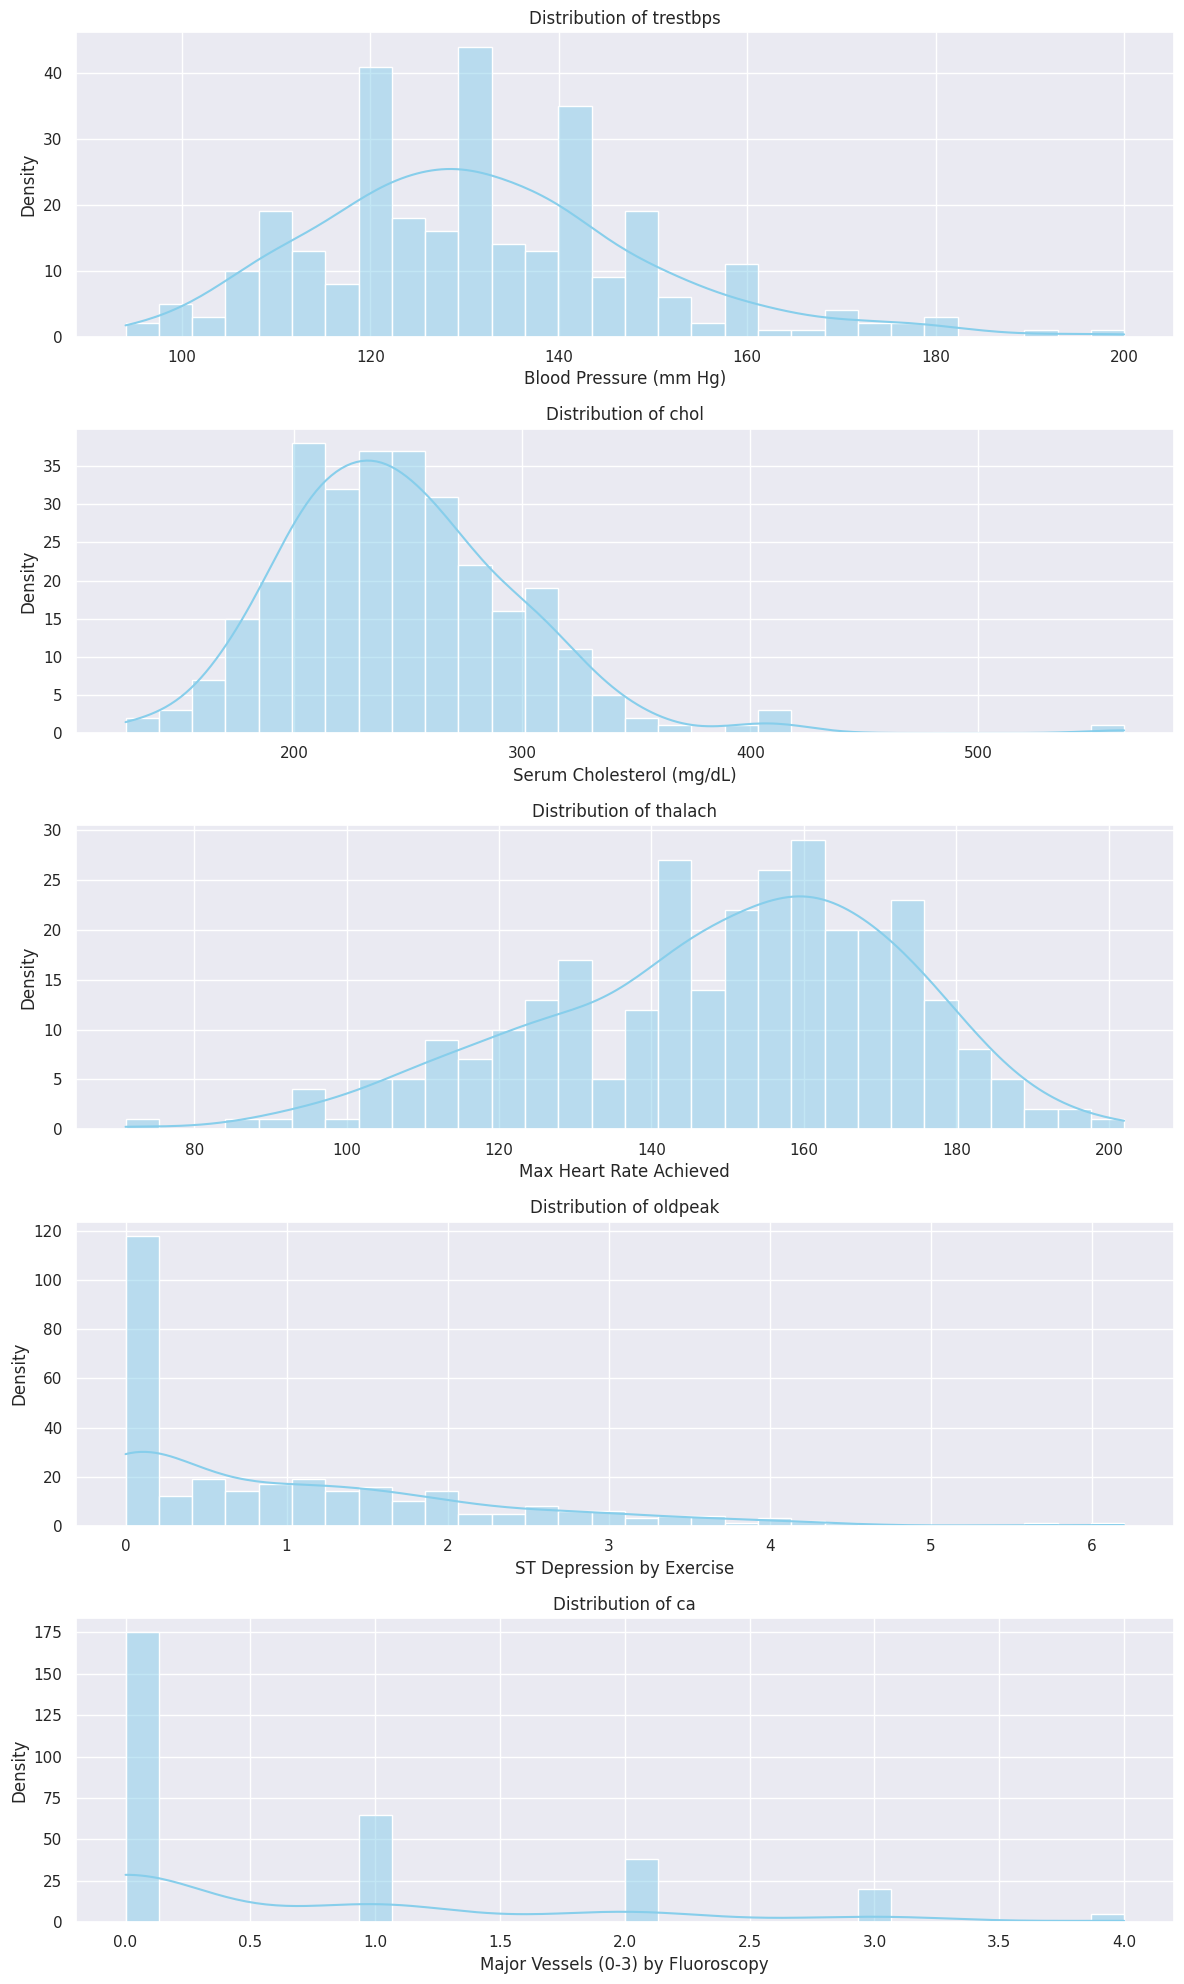

In [79]:
continuous = {
    'trestbps': 'Blood Pressure (mm Hg)',
    'chol': 'Serum Cholesterol (mg/dL)',
    'thalach': 'Max Heart Rate Achieved',
    'oldpeak': 'ST Depression by Exercise',
    'ca': 'Major Vessels (0-3) by Fluoroscopy'
}

def plot_continuous():
    fig, axes = plt.subplots(len(continuous), 1, figsize=(12, 20))

    for i, (col, xlabel) in enumerate(continuous.items()):
        sns.histplot(data[col], kde=True, ax=axes[i], bins=30, color="skyblue")
        axes[i].set_title(f"Distribution of {col}")
        axes[i].set_xlabel(xlabel)
        axes[i].set_ylabel("Density")

    plt.tight_layout()
    plt.show()

plot_continuous()

Calculating the frequency of heart disease for ages(29-77)

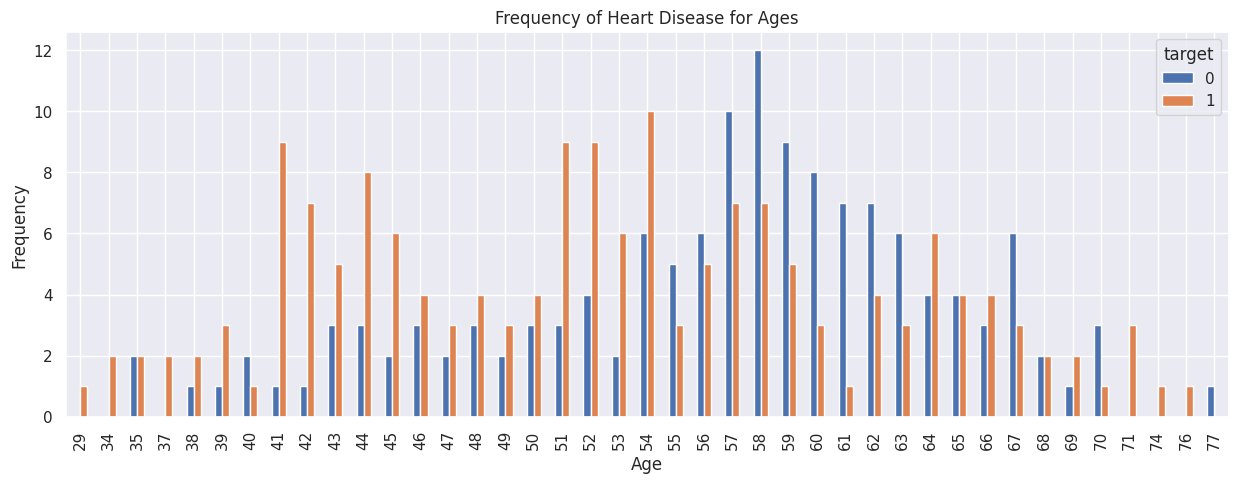

In [81]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(15,5))

plt.title('Frequency of Heart Disease for Ages')

plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

Calculating the frequency of Heart Disease for sex

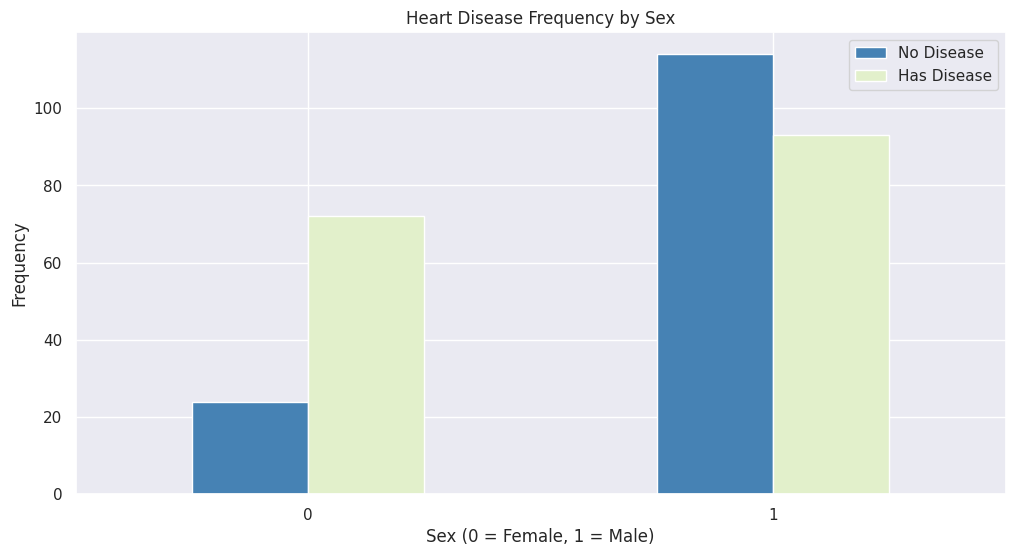

In [82]:
pd.crosstab(data.sex, data.target).plot(kind="bar", figsize=(12,6), color=['#4682B4', '#E2F0CB'])

plt.title('Heart Disease Frequency by Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(["No Disease", "Has Disease"])

plt.show()

Calculating the frequency of heart disease according to Fasting Blood Sugar

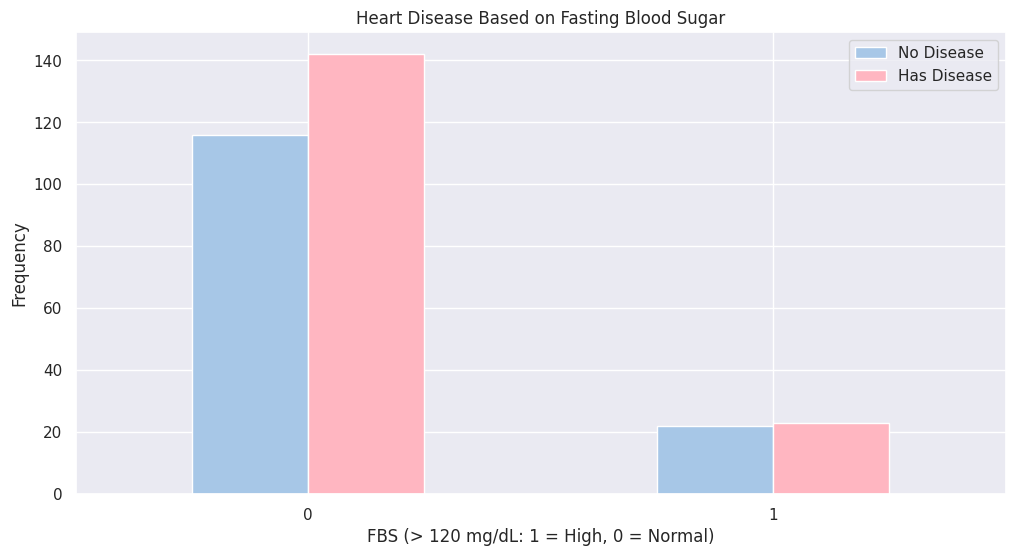

In [83]:
pd.crosstab(data.fbs, data.target).plot(kind="bar", figsize=(12,6), color=['#A7C7E7', '#FFB6C1'])

plt.title("Heart Disease Based on Fasting Blood Sugar")
plt.xlabel('FBS (> 120 mg/dL: 1 = High, 0 = Normal)')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(["No Disease", "Has Disease"])

plt.show()

Analysing Thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

<Axes: xlabel='thal', ylabel='target'>

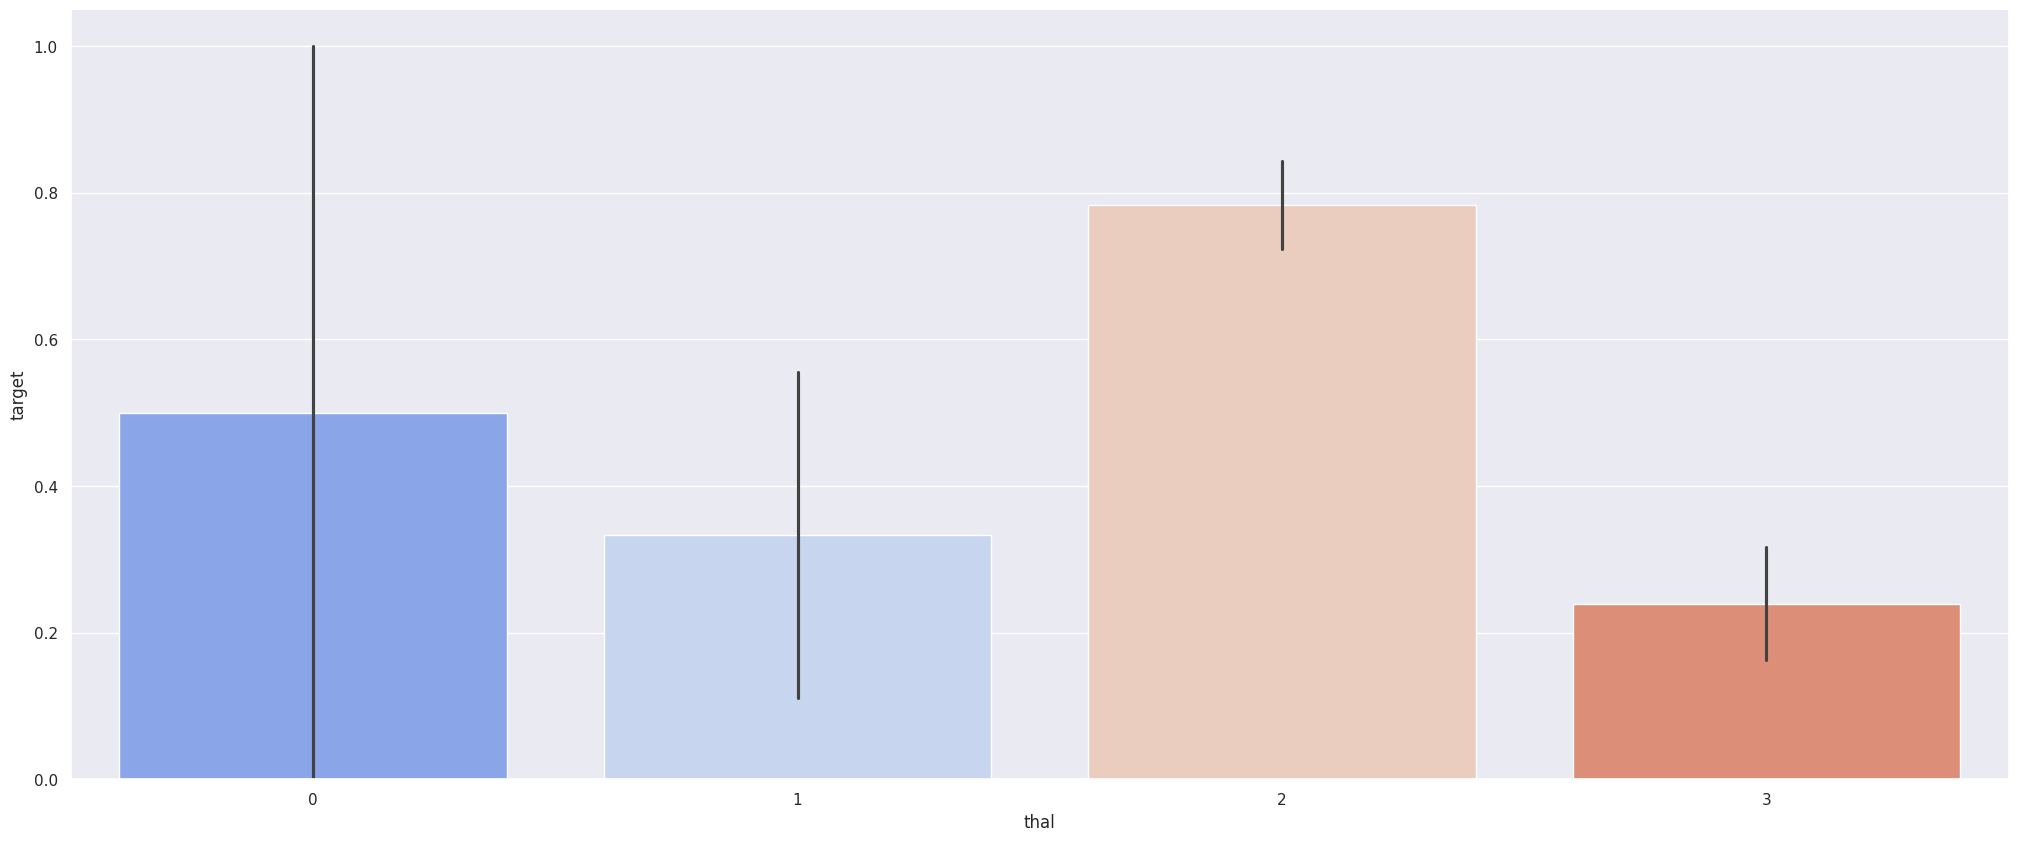

In [84]:
data["thal"].unique()
plt.figure(figsize=(25, 10))
sns.barplot(x=data["thal"], y=data["target"],palette="coolwarm")

Analysing Peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

<Axes: xlabel='slope', ylabel='target'>

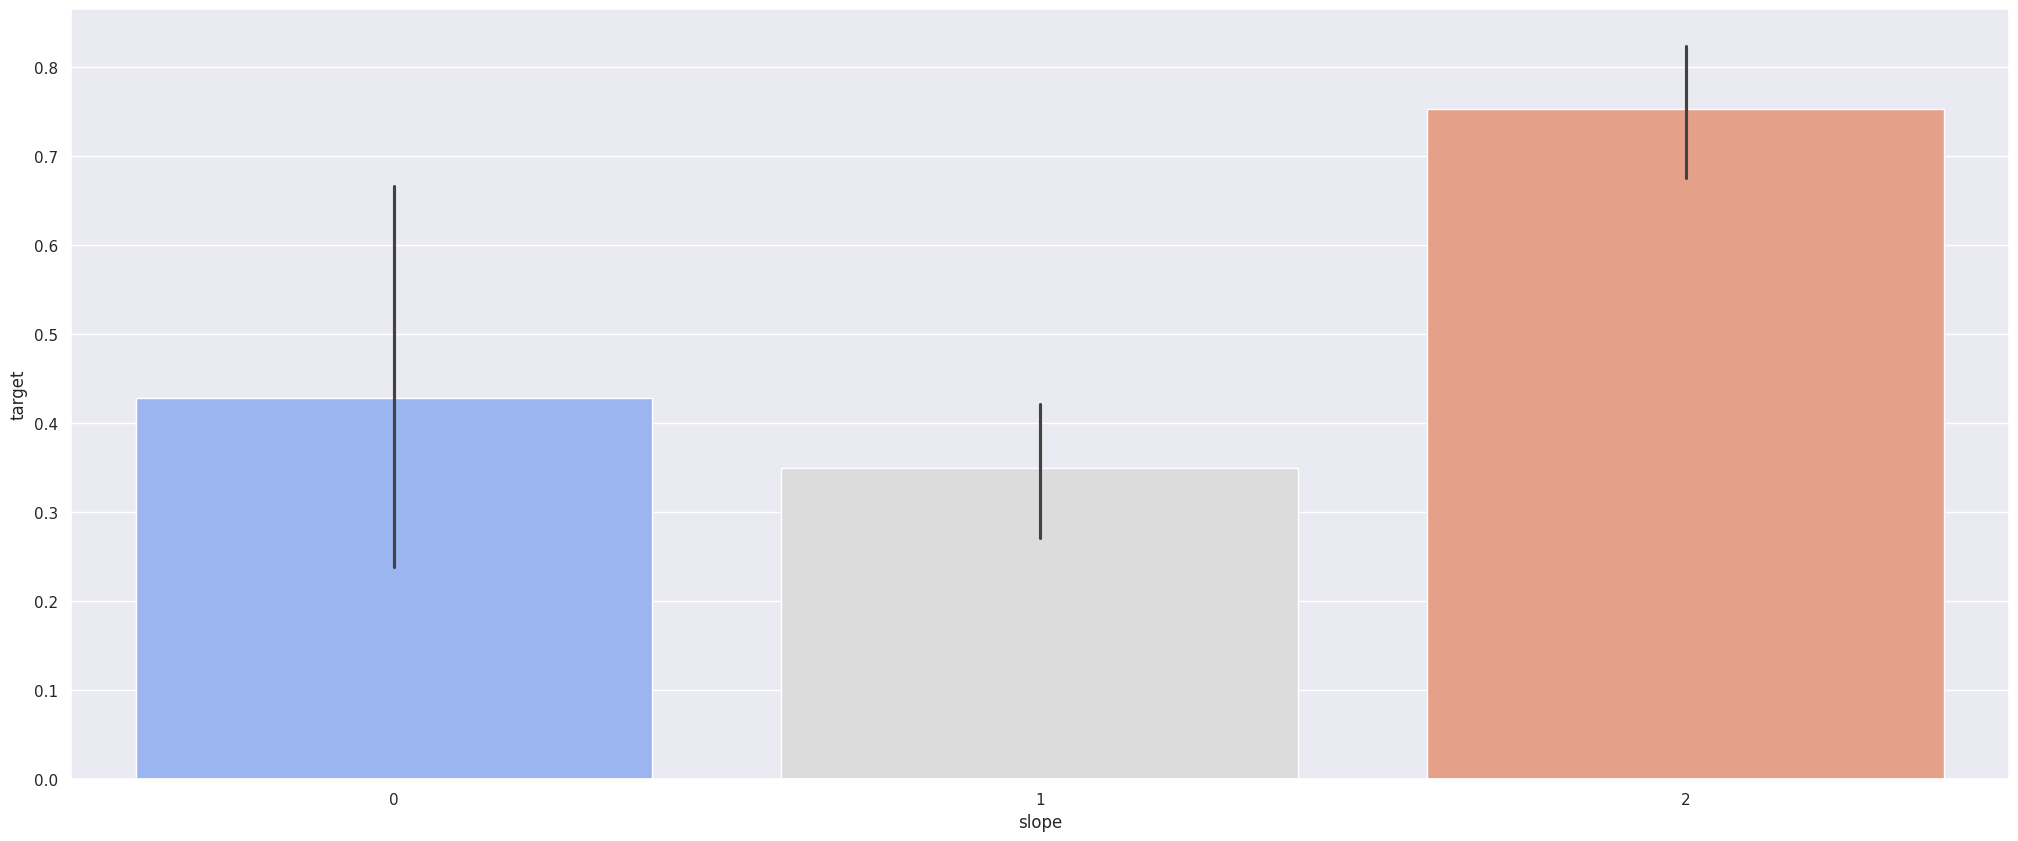

In [85]:
data["slope"].unique()
plt.figure(figsize=(25, 10))
sns.barplot(x=data["slope"], y=data["target"],palette="coolwarm")

Analysing Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

<Axes: xlabel='restecg', ylabel='target'>

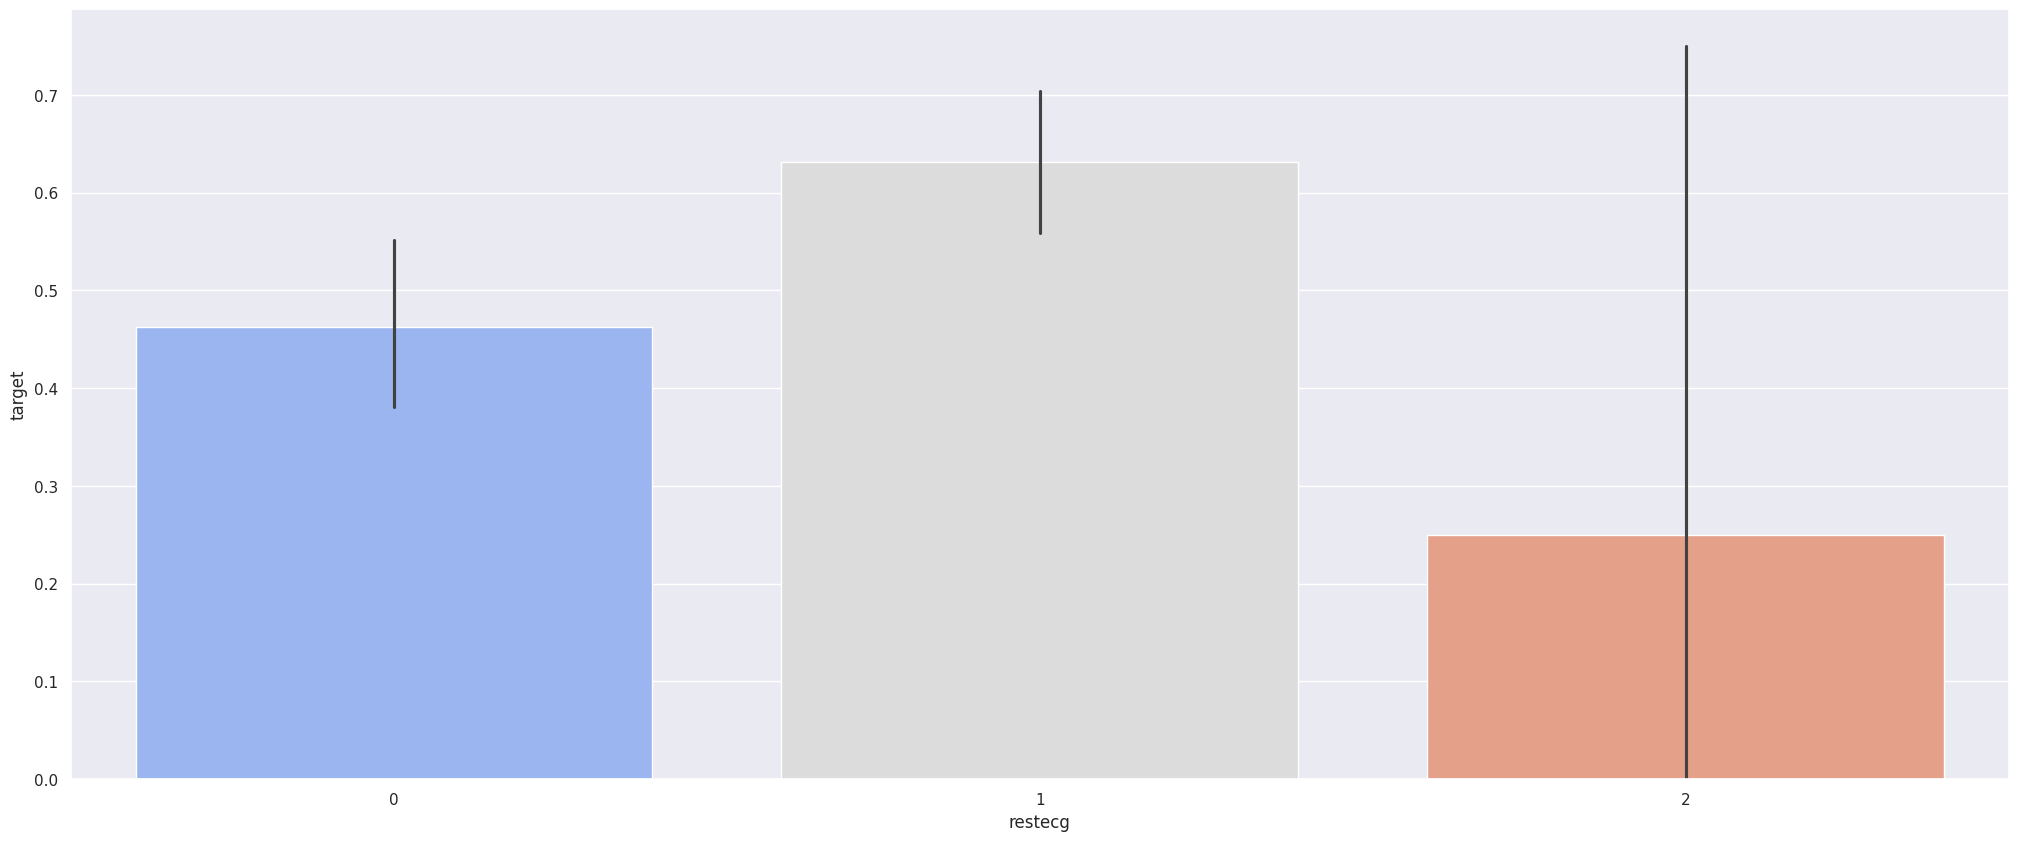

In [86]:
data["restecg"].unique()
plt.figure(figsize=(25, 10))
sns.barplot(x=data["restecg"], y=data["target"],palette="coolwarm")

Analysing Chest pain (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

<Axes: xlabel='cp', ylabel='target'>

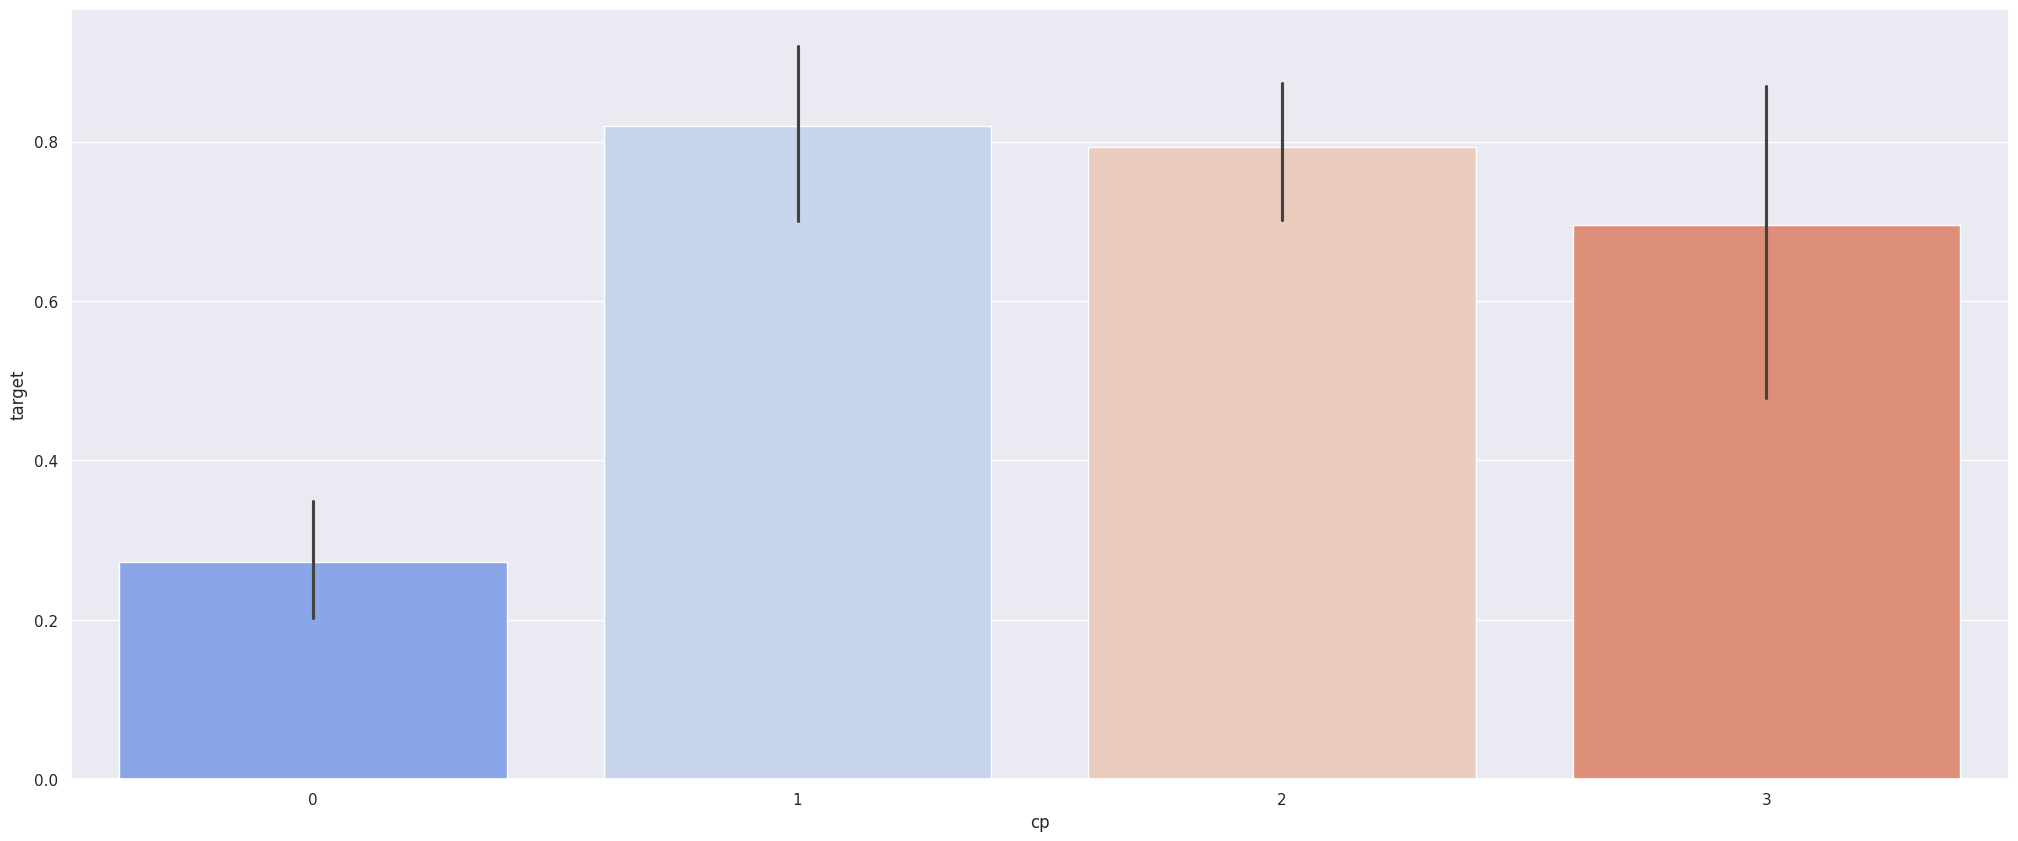

In [87]:
data["cp"].unique()
plt.figure(figsize=(25, 10))
sns.barplot(x=data["cp"], y=data["target"],palette="coolwarm")

Analysing Person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

<Axes: xlabel='fbs', ylabel='target'>

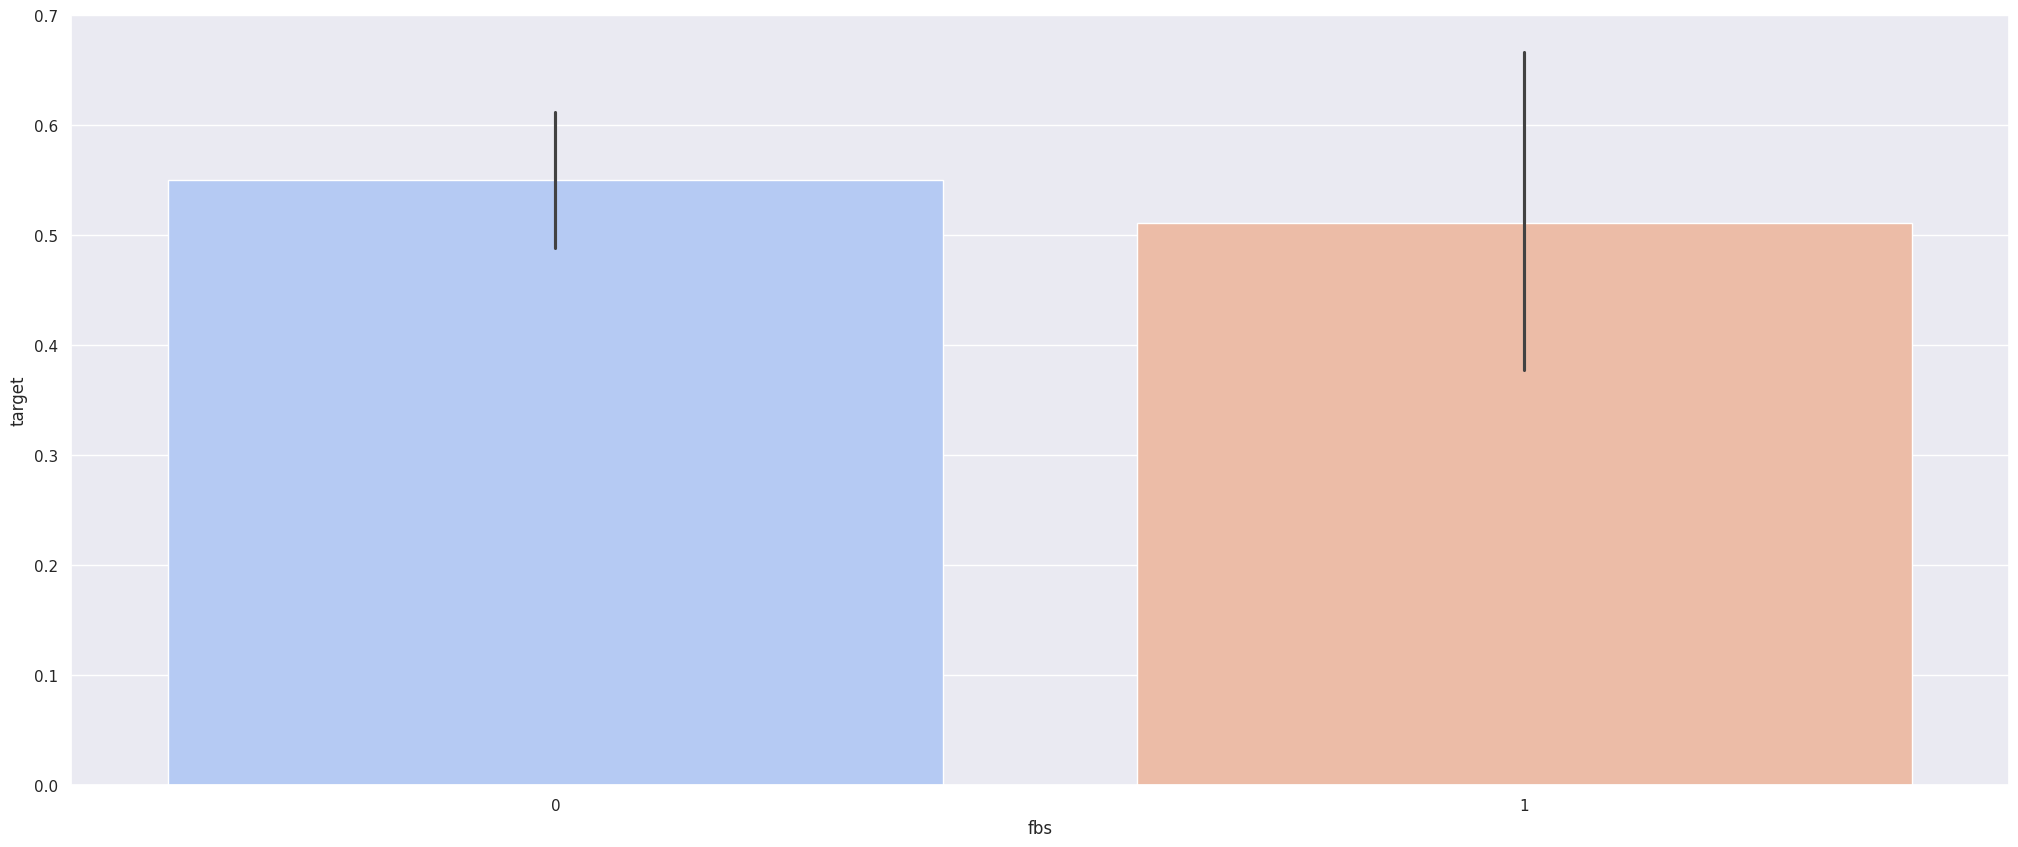

In [88]:
data["fbs"].unique()
plt.figure(figsize=(25, 10))
sns.barplot(x=data["fbs"], y=data["target"],palette="coolwarm")

For exploring relationships between features

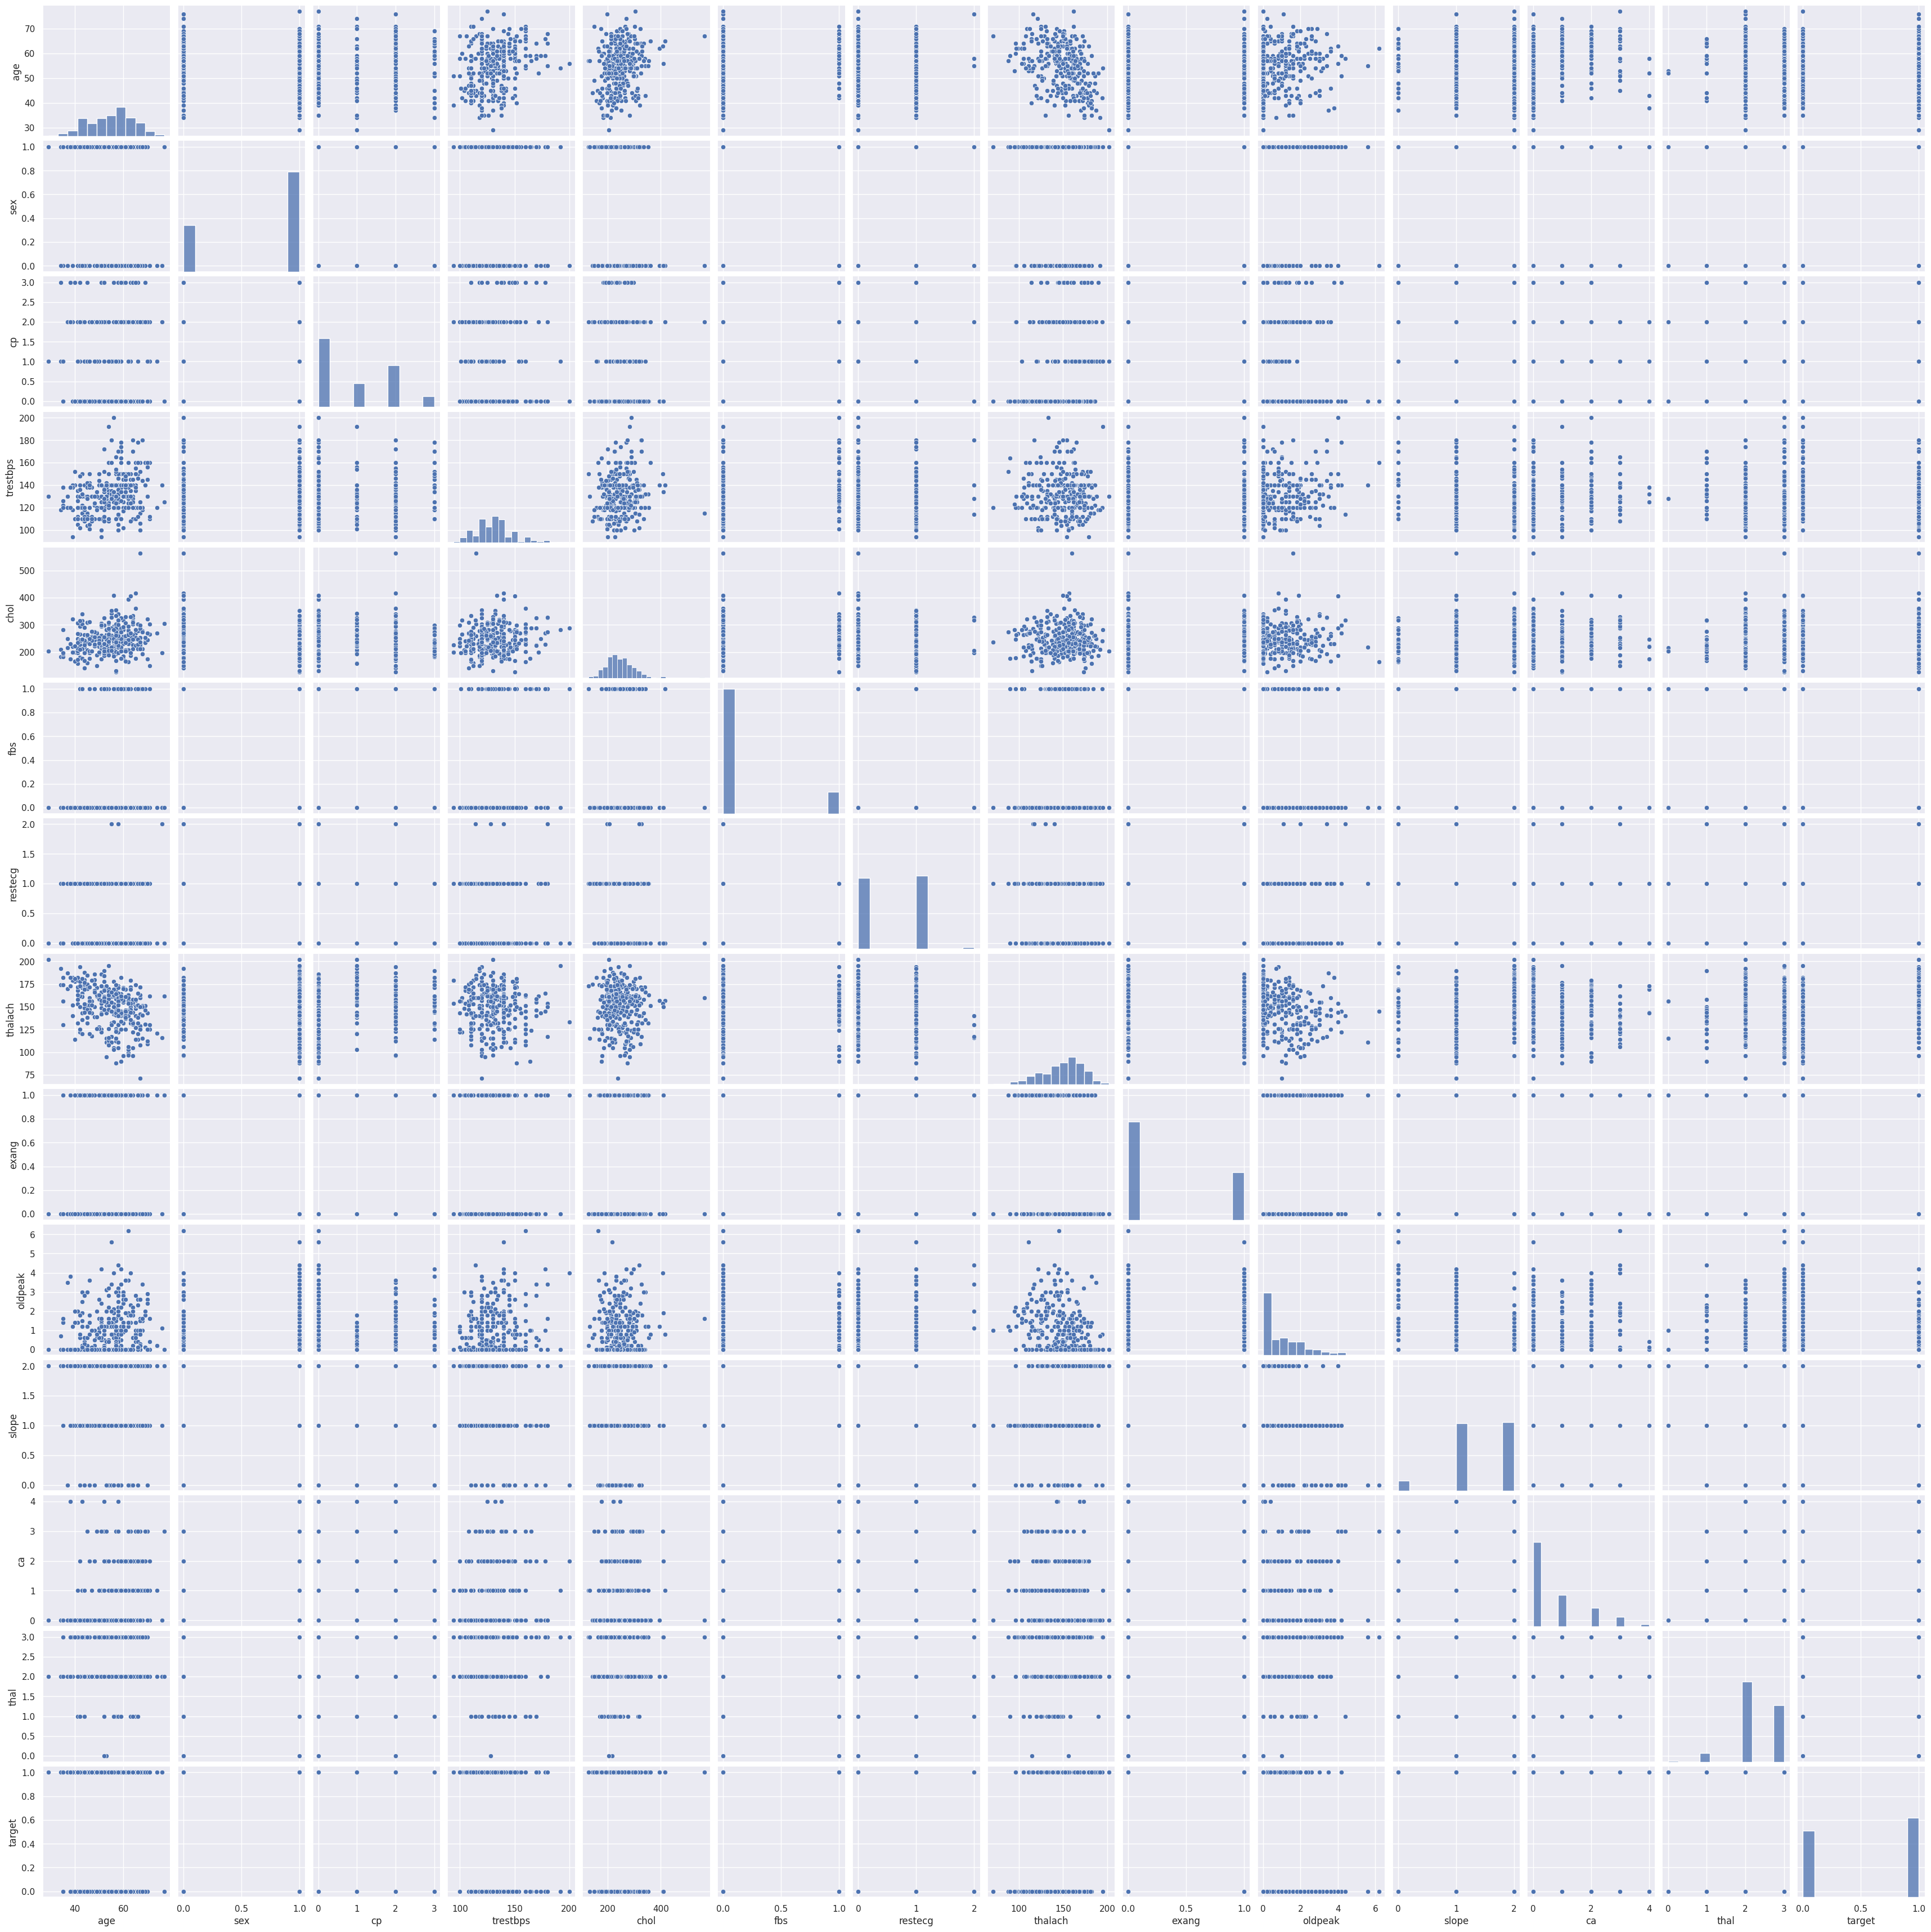

In [80]:
sns.pairplot(data=data)

For the Correlational Plot

In [15]:
cnames=['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression','num_major_vessels']

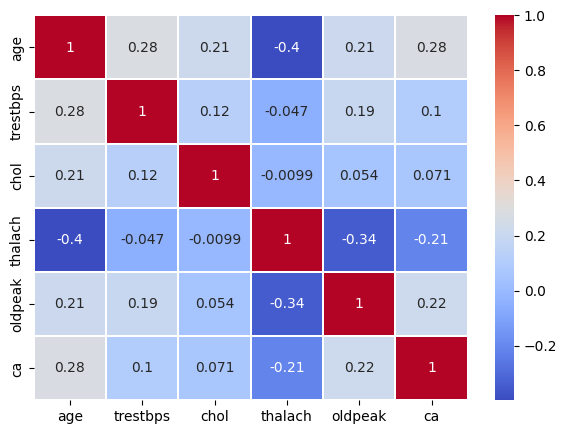

In [16]:
cnames=['age','trestbps','chol','thalach','oldpeak','ca']
f, ax = plt.subplots(figsize=(7, 5))

df_corr = data.loc[:,cnames]
corr = df_corr.corr()

sns.heatmap(corr, annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

For the Correlational analysis

In [17]:
df_corr = data[cnames]
df_corr

,age,trestbps,chol,thalach,oldpeak,ca
0,63,145,233,150,2.3,0
1,37,130,250,187,3.5,0
2,41,130,204,172,1.4,0
3,56,120,236,178,0.8,0
4,57,120,354,163,0.6,0
...,...,...,...,...,...,...
298,57,140,241,123,0.2,0
299,45,110,264,132,1.2,0
300,68,144,193,141,3.4,2
301,57,130,131,115,1.2,1


________________________________________________________________________________

**Splitting the dataset for training & testing**

Spltting Dataset for Training and Testing on 5 different models. Last column i.e. target will be the one checked against all other columns to find algorithm giving best accuracy.

In [18]:
prediction_variable = data.drop("target",axis=1)
target_variable = data["target"]

Data of prediction_variable will be split such that it is 80% for Training, 20% for Testing

In [19]:
X_train,X_test,Y_train,Y_test = train_test_split(prediction_variable, target_variable,test_size=0.20,random_state=0)

Shape of each test and train variable

In [20]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


**1.** LOGISTIC REGRESSION

In [21]:
Logistic_Regression = LogisticRegression()

Logistic_Regression.fit(X_train,Y_train)

Y_predicted_LogisticRegression = Logistic_Regression.predict(X_test)

In [22]:
score_Logistic_Regression = round(accuracy_score(Y_predicted_LogisticRegression,Y_test)*100,2)

print("Accuracy score achieved using Logistic Regression is: "+str(score_Logistic_Regression)+" %")

Accuracy score achieved using Logistic Regression is: 85.25 %


Confusion Matrix

Confusion matrix for the predicted values (Y_pred_lrn) against the actual values (Y_test) of data(heart.csv) dataset.

In [23]:
matrix= confusion_matrix(Y_test, Y_predicted_LogisticRegression)

Using the Seaborn library to visualize the confusion matrix as a heatmap, which is a graphical representation of the matrix.

<Axes: >

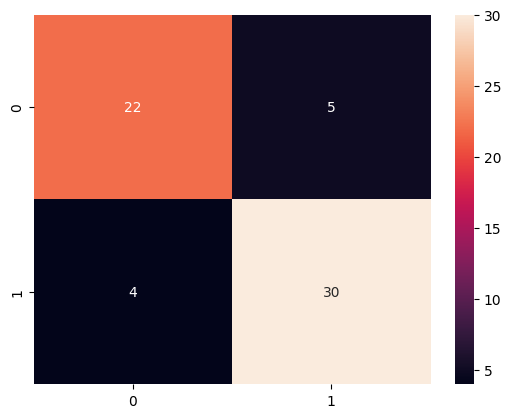

In [24]:
sns.heatmap(matrix,annot = True, fmt = "d")

Precision Score

In [25]:
precision = precision_score(Y_test, Y_predicted_LogisticRegression)
print("Precision score in LR is: ",precision)

Precision score in LR is:  0.8571428571428571


Recall

Formula for Recall:

Recall = 𝑇𝑃/ (𝑇𝑃 + FN)

TP (True Positive): The number of instances correctly predicted as positive. FN (False Negative): The number of instances that were actually positive but were predicted as negative.

In [26]:
recall = recall_score(Y_test, Y_predicted_LogisticRegression)
print("Recall in LR is: ",recall)

Recall in LR is:  0.8823529411764706


F-Score

F Score also referred to as F1 score is a metric used to measure a model's accuracy, specifically when the dataset is imbalanced. It considers both precision and recall and gives a balanced score.

In [27]:
print((2*precision*recall)/(precision+recall))

0.8695652173913043


Bad cm style

Using Pandas to create a confusion matrix (CM) from the actual (Y_test) and predicted (Y_pred_knn) labels by constructing a cross-tabulation (or contingency table) between them.

In [28]:
CM = pd.crosstab(Y_test, Y_predicted_LogisticRegression)
CM

col_0,0,1
target,,
0,22,5
1,4,30


Extracting the values from the confusion matrix (CM) into variables representing the True Negatives (TN), False Positives (FP), False Negatives (FN), and True Positives (TP).

In [29]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

False Negative Rate

The False Negative Rate (FNR) is a performance metric used to measure the proportion of actual positives that are incorrectly predicted as negative (false negatives).

In [30]:
fnr = FN*100/(FN+TP)
fnr

np.float64(11.764705882352942)

**2.** NAIVE BAYES

In [31]:
Naive_Bayes = GaussianNB()

Naive_Bayes.fit(X_train, Y_train)

Y_predicted_NaiveBayes = Naive_Bayes.predict(X_test)

In [32]:
score_NaiveBayes = round(accuracy_score(Y_predicted_NaiveBayes,Y_test)*100,2)

print("Accuracy score achieved using Naive Bayes is: "+str(score_NaiveBayes)+" %")

Accuracy score achieved using Naive Bayes is: 85.25 %


Confusion Matrix

<Axes: >

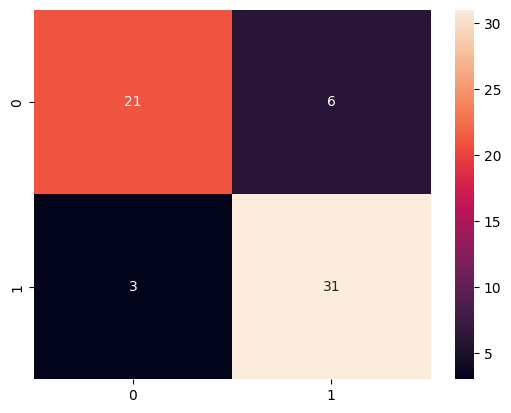

In [33]:
matrix= confusion_matrix(Y_test, Y_predicted_NaiveBayes)
sns.heatmap(matrix,annot = True, fmt = "d")

Precision Score

In [34]:
precision = precision_score(Y_test, Y_predicted_NaiveBayes)
print("Precision score in NB is: ",precision)

Precision score in NB is:  0.8378378378378378


Recall

In [35]:
recall = recall_score(Y_test, Y_predicted_NaiveBayes)
print("Recall in NB is: ",recall)

Recall in NB is:  0.9117647058823529


F-Score

In [36]:
print((2*precision*recall)/(precision+recall))

0.8732394366197184


Bad cm style

In [37]:
CM = pd.crosstab(Y_test, Y_predicted_NaiveBayes)
CM

col_0,0,1
target,,
0,21,6
1,3,31


In [38]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

False Negative Rate

In [39]:
fnr = FN*100/(FN+TP)
fnr

np.float64(8.823529411764707)

**3.** K NEAREST NEIGHBORS

In [40]:
KNN = KNeighborsClassifier(n_neighbors=6)
KNN.fit(X_train, Y_train)
Y_predicted_KNN = KNN.predict(X_test)

In [41]:
score_Knn = round(accuracy_score(Y_predicted_KNN,Y_test)*100,2)

print("Accuracy score achieved using KNN is: "+str(score_Knn)+" %")

Accuracy score achieved using KNN is: 65.57 %


Confusion Matrix

<Axes: >

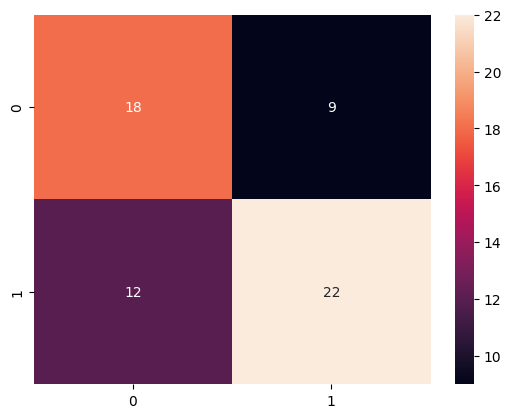

In [42]:
matrix= confusion_matrix(Y_test, Y_predicted_KNN)
sns.heatmap(matrix,annot = True, fmt = "d")

Precision Score

In [43]:
precision = precision_score(Y_test, Y_predicted_KNN)
print("Precision score in KNN is: ",precision)

Precision score in KNN is:  0.7096774193548387


Recall

In [44]:
recall = recall_score(Y_test, Y_predicted_KNN)
print("Recall in KNN is: ",recall)

Recall in KNN is:  0.6470588235294118


F-Score

In [45]:
print((2*precision*recall)/(precision+recall))

0.6769230769230768


Bad cm style

In [46]:
CM = pd.crosstab(Y_test, Y_predicted_KNN)
CM

col_0,0,1
target,,
0,18,9
1,12,22


In [47]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

False Negative Rate

In [48]:
fnr = FN*100/(FN+TP)
fnr

np.float64(35.294117647058826)

**4.** DECISION TREE

In [49]:
max_accuracy = 0

for x in range(200):
    Decision_Tree = DecisionTreeClassifier(random_state = x)
    Decision_Tree.fit(X_train,Y_train)
    Y_predicted_DecisionTree = Decision_Tree.predict(X_test)
    current_accuracy = float(f"{accuracy_score(Y_predicted_DecisionTree, Y_test)*100 : .2f}")
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

print(max_accuracy)
print(best_x)


Decision_Tree = DecisionTreeClassifier(random_state = best_x)
Decision_Tree.fit(X_train,Y_train)
Y_predicted_DecisionTree = Decision_Tree.predict(X_test)

81.97
11


In [50]:
score_DecisionTree = round(accuracy_score(Y_predicted_DecisionTree,Y_test)*100,2)

print("Accuracy score achieved using Decision Tree is: "+str(score_DecisionTree)+" %")

Accuracy score achieved using Decision Tree is: 81.97 %


Confusion Matrix

<Axes: >

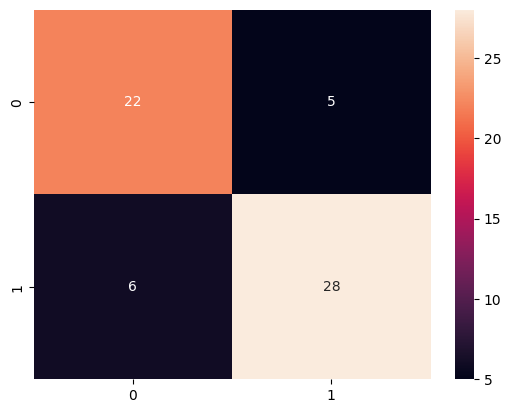

In [51]:
matrix= confusion_matrix(Y_test, Y_predicted_DecisionTree)
sns.heatmap(matrix,annot = True, fmt = "d")

Precision Score

In [52]:
precision = precision_score(Y_test, Y_predicted_DecisionTree)
print("Precision score in DT is: ",precision)

Precision score in DT is:  0.8484848484848485


Recall

In [53]:
recall = recall_score(Y_test, Y_predicted_DecisionTree)
print("Recall in DT is: ",recall)

Recall in DT is:  0.8235294117647058


F-Score

In [54]:
print((2*precision*recall)/(precision+recall))

0.8358208955223881


Bad cm style

In [55]:
CM = pd.crosstab(Y_test, Y_predicted_DecisionTree)
CM

col_0,0,1
target,,
0,22,5
1,6,28


In [56]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

False Negative Rate

In [57]:
fnr = FN*100/(FN+TP)
fnr

np.float64(17.647058823529413)

**5.** RANDOM FOREST

In [58]:
max_accuracy = 0

for x in range(2000):
    Random_Forest = RandomForestClassifier(random_state=x)
    Random_Forest.fit(X_train,Y_train)
    Y_predicted_RandomForest = Random_Forest.predict(X_test)
    current_accuracy = float(f"{accuracy_score(Y_predicted_RandomForest, Y_test)*100 : .2f}")
    if(current_accuracy > max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

print(max_accuracy)
print(best_x)

Random_Forest = RandomForestClassifier(random_state=best_x)
Random_Forest.fit(X_train,Y_train)
Y_predicted_RandomForest = Random_Forest.predict(X_test)

90.16
323


Learning curve for training score & cross validation score

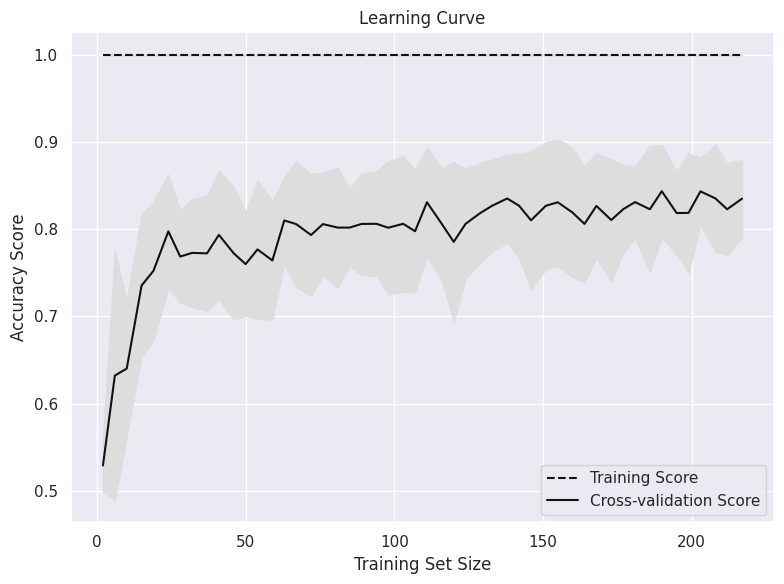

In [72]:
# Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    RandomForestClassifier(), X_train, Y_train, cv=10, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.01, 1.0, 50)
)

# Mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, '--', color="#111111", label="Training Score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation Score")

# Draw shaded regions
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Labels and title
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [59]:
score_RandomForest = round(accuracy_score(Y_predicted_RandomForest,Y_test)*100,2)

print("Accuracy score achieved using Random Forest is: "+str(score_RandomForest)+" %")

Accuracy score achieved using Random Forest is: 90.16 %


Confusion Matrix

<Axes: >

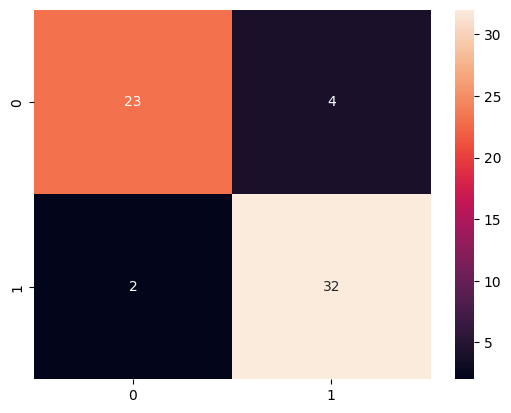

In [60]:
matrix= confusion_matrix(Y_test, Y_predicted_RandomForest)
sns.heatmap(matrix,annot = True, fmt = "d")

Precision Score

In [61]:
precision = precision_score(Y_test, Y_predicted_RandomForest)
print("Precision score in RF is: ",precision)

Precision score in RF is:  0.8888888888888888


Recall

In [62]:
recall = recall_score(Y_test, Y_predicted_RandomForest)
print("Recall in RF is: ",recall)

Recall in RF is:  0.9411764705882353


F-Score

In [63]:
print((2*precision*recall)/(precision+recall))

0.9142857142857143


Bad cm style

In [64]:
CM =pd.crosstab(Y_test, Y_predicted_RandomForest)
CM

col_0,0,1
target,,
0,23,4
1,2,32


In [65]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

False Negative Rate

In [66]:
fnr=FN*100/(FN+TP)
fnr

np.float64(5.882352941176471)

________________________________________________________________________________

**Final Result**

In [67]:
scores = [score_Logistic_Regression,score_NaiveBayes,score_Knn,score_DecisionTree,score_RandomForest]
algorithms = ["Logistic Regression","Naive Bayes","K-Nearest Neighbors","Decision Tree","Random Forest"]

for i in range(len(algorithms)):
    print("Accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

Accuracy score achieved using Logistic Regression is: 85.25 %
Accuracy score achieved using Naive Bayes is: 85.25 %
Accuracy score achieved using K-Nearest Neighbors is: 65.57 %
Accuracy score achieved using Decision Tree is: 81.97 %
Accuracy score achieved using Random Forest is: 90.16 %


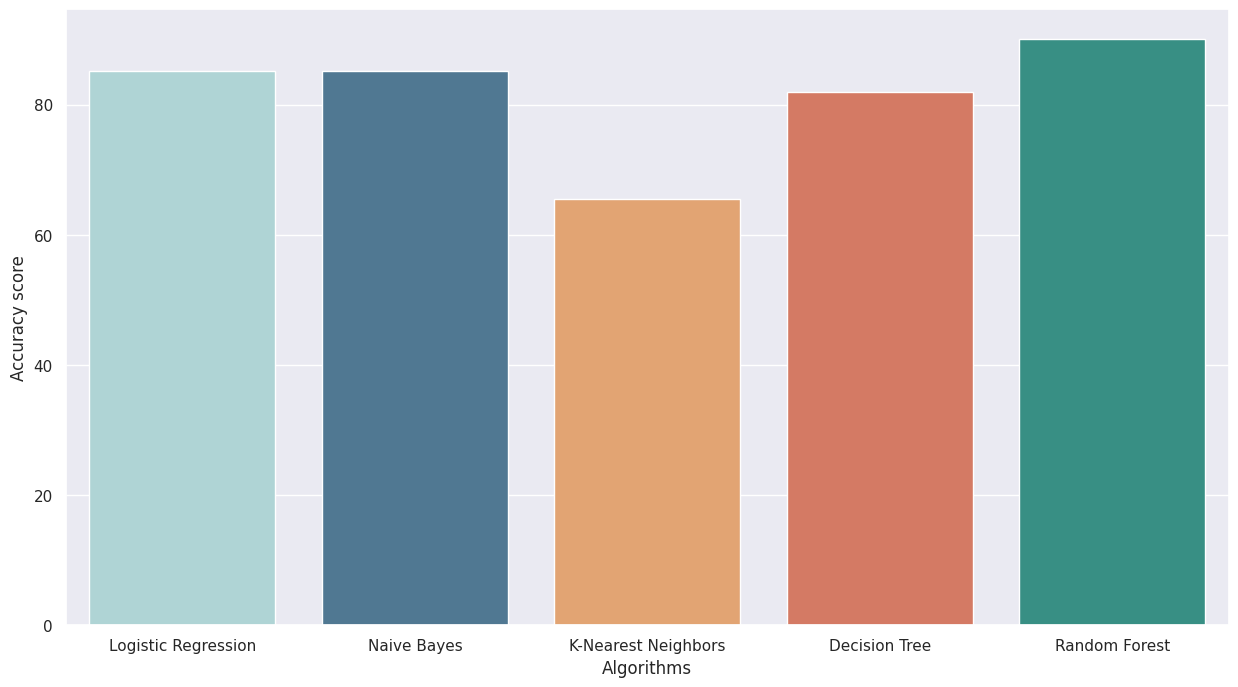

In [68]:
colours = ["#A8DADC", "#457B9D", "#F4A261", "#E76F51", "#2A9D8F"]

sns.set(rc={'figure.figsize':(15,8)})

sns.barplot(x=algorithms, y=scores, palette=colours)

plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

plt.show()

So, we can conclude that Random Forest is the best algorithm among all the 5 algorithms that we have used here and K nearest neighbors is the worst algorithm.